In [6]:
import cv2 
import os
import numpy as np 
import matplotlib.pyplot as plt 


In [ ]:
pwd

In [ ]:
# cap =cv2.VideoCapture('small_Card_videoL.mp4')   # 0 for Primary Camera , 1 for Secondary Camera , 2 ... etc
# cap =cv2.VideoCapture('small_Card_motionc.mp4')   # 0 for Primary Camera , 1 for Secondary Camera , 2 ... etc
cap =cv2.VideoCapture('small_Card_motion_rescaled.mp4')   # 0 for Primary Camera , 1 for Secondary Camera , 2 ... etc
kernel = np.ones((21,21),np.uint8)
i=0  #cv2.VideoCapture() args :  int Or "Directory for Video"
while(1):
    p1,p2,p3,p4=0, 0, 0, 0
    ret,frame = cap.read()  # reading each frame : ret is a boolean if reading is done correctly or not , frame\
    if ret:
        print('i= ',i)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # ret,thresh1 = cv2.threshold(gray,40,255,cv2.THRESH_BINARY) # settings for video "small_Card_videoL.mp4"
        ret,thresh1 = cv2.threshold(gray,220,255,cv2.THRESH_BINARY) # settings for video "small_Card_motionc.mp4"
        opening = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)
        # opening = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
        # opening = cv2.dilate(opening,kernel,iterations = 1)

        # ret,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
        # hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        # edges = cv2.Canny(frame,100,200)
        # cv2.imshow('Gray',gray) 
        # cv2.imshow('thresh1',thresh1) 
        cv2.imshow('thresh1',opening) 

        if not os.path.exists('Frames_Folder'):
            os.makedirs('Frames_Folder')
            
        # Y,X= np.where(thresh1==255)
        Y,X= np.where(opening==255)

        max_y=max(Y)
        min_y=min(Y)
        max_x=max(X)
        min_x=min(X)
        width=max_x-min_x+1
        height=max_y-min_y+1
        
        
        #Only Two Errors
        corners = cv2.goodFeaturesToTrack(opening,4,0.00001,10)
        print('corners=',corners)
        corners = np.int0(corners)
        corners=corners.tolist()
        c=0
        corners_tuple=[]
        for item in corners:
            corners_tuple.append(tuple(corners[c][0]))
            c=c+1
        
        sorted_corners=sorted(corners_tuple, key=lambda c:c[1])
        print('corners tuple= \n',corners_tuple)
        print('sorted_corners = \n',sorted_corners)
        
        if sorted_corners[0][0]< sorted_corners[1][0]:
            p1=sorted_corners[0]
            p2=sorted_corners[1]
        else:
            p2=sorted_corners[0]
            p1=sorted_corners[1]
            
        if sorted_corners[2][0]< sorted_corners[3][0]:
            p3=sorted_corners[2]
            p4=sorted_corners[3]
        else:
            p4=sorted_corners[2]
            p3=sorted_corners[3]
            
        print('p1= ',p1)
        print('p2= ', p2)
        print('p3= ', p3)
        print('p4= ', p4)
        print('original image shape width={0) height={1}', thresh1.shape[1], thresh1.shape[0])
        print('rectangle width={1} height={1}',width, height)
        pts1 = np.float32([p1,p2,p3,p4])
        pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(frame,M,(width,height))
        plt.subplot(151),plt.imshow(frame),plt.title('Input')
        plt.subplot(152),plt.imshow(gray,'gray'),plt.title('gray')
        plt.subplot(153),plt.imshow(thresh1,'gray'),plt.title('thresh1')
        plt.subplot(154),plt.imshow(dst),plt.title('Output')
        if(width>height):
            filename_rotated='Frames_Folder/'+str(i)+'_Rotated_Frame.jpg'
            pts1 = np.float32([[0,0],[width,0],[0,height],[width,height]])
            pts2 = np.float32([[0,width],[0,0],[height,width],[height,0]])
            M2 = cv2.getPerspectiveTransform(pts1,pts2)
            dst2 = cv2.warpPerspective(dst,M2,(height,width))
            plt.subplot(155),plt.imshow(dst2),plt.title('RotatedOutput')
            save_check=cv2.imwrite( filename_rotated, dst2) 
        plt.show()
        
        filename='Frames_Folder/'+str(i)+'_Frame.jpg'
        filename_original='Frames_Folder/'+str(i)+'_original_Frame.jpg'
        save_check=cv2.imwrite( filename, dst)  
        save_check_original=cv2.imwrite( filename_original, frame)  
        if save_check== False:
            print('NOT successfully saved!**')
        print('*****************\n')    

    
        i=i+1
        if cv2.waitKey(1000) & 0xFF == ord('q'):# 0xFF is a hexadecimal constant which is 11111111 in binary.
            break                           # By using bitwise AND (&) with this constant,   
    else:
        break
cap.release()                             # it leaves only the last 8 bits of the original
cv2.destroyAllWindows()  
        

In [ ]:
card_img=cv2.imread('card_A.png')
width_card=card_img.shape[1]
height_card=card_img.shape[0]
print('card_A width_height=', width_card, height_card)

# M = cv2.getRotationMatrix2D(((width_card)//2.0,(height_card)//2.0),45,1) # Center , Angle , Scale
# dst = cv2.warpAffine(card_img,M,(width_card,height_card)) # outputshape
# plt.imshow(dst)

pts1 = np.float32([[0,0],[width_card,0],[0,height_card],[width_card,height_card]])
pts2 = np.float32([[0,width_card],[0,0],[height_card,width_card],[height_card,0]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(card_img,M,(height_card,width_card))
plt.subplot(121),plt.imshow(card_img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

i=  0
corners= [[[278. 269.]]

 [[113. 269.]]

 [[278.  90.]]

 [[113.  90.]]]
corners tuple= 
 [(278, 269), (113, 269), (278, 90), (113, 90)]
sorted_corners = 
 [(278, 90), (113, 90), (278, 269), (113, 269)]
p1=  (113, 90)
p2=  (278, 90)
p3=  (113, 269)
p4=  (278, 269)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 166 186


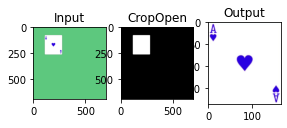

*****************

i=  1
corners= [[[122. 257.]]

 [[281. 273.]]

 [[138.  83.]]

 [[268. 273.]]]
corners tuple= 
 [(122, 257), (281, 273), (138, 83), (268, 273)]
sorted_corners = 
 [(138, 83), (122, 257), (281, 273), (268, 273)]
p1=  (122, 257)
p2=  (138, 83)
p3=  (268, 273)
p4=  (281, 273)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 177 193


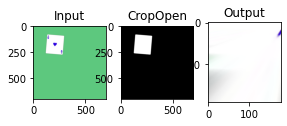

*****************

i=  2
corners= [[[293. 273.]]

 [[334. 110.]]

 [[184.  74.]]

 [[145. 238.]]]
corners tuple= 
 [(293, 273), (334, 110), (184, 74), (145, 238)]
sorted_corners = 
 [(184, 74), (334, 110), (145, 238), (293, 273)]
p1=  (184, 74)
p2=  (334, 110)
p3=  (145, 238)
p4=  (293, 273)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 191 203


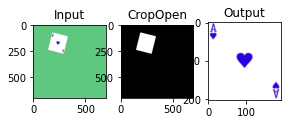

*****************

i=  3
corners= [[[236.  66.]]

 [[304. 271.]]

 [[367. 126.]]

 [[170. 215.]]]
corners tuple= 
 [(236, 66), (304, 271), (367, 126), (170, 215)]
sorted_corners = 
 [(236, 66), (367, 126), (170, 215), (304, 271)]
p1=  (236, 66)
p2=  (367, 126)
p3=  (170, 215)
p4=  (304, 271)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 198 207


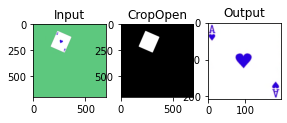

*****************

i=  4
corners= [[[310. 269.]]

 [[256.  66.]]

 [[184. 204.]]

 [[380. 130.]]]
corners tuple= 
 [(310, 269), (256, 66), (184, 204), (380, 130)]
sorted_corners = 
 [(256, 66), (380, 130), (184, 204), (310, 269)]
p1=  (256, 66)
p2=  (380, 130)
p3=  (184, 204)
p4=  (310, 269)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 199 206


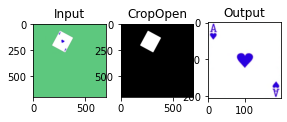

*****************

i=  5
corners= [[[311.  65.]]

 [[317. 264.]]

 [[215. 182.]]

 [[409. 149.]]]
corners tuple= 
 [(311, 65), (317, 264), (215, 182), (409, 149)]
sorted_corners = 
 [(311, 65), (409, 149), (215, 182), (317, 264)]
p1=  (311, 65)
p2=  (409, 149)
p3=  (215, 182)
p4=  (317, 264)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 199 201


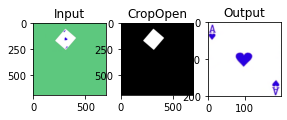

*****************

i=  6
corners= [[[248. 153.]]

 [[435. 174.]]

 [[325. 256.]]

 [[361.  71.]]]
corners tuple= 
 [(248, 153), (435, 174), (325, 256), (361, 71)]
sorted_corners = 
 [(361, 71), (248, 153), (435, 174), (325, 256)]
p1=  (248, 153)
p2=  (361, 71)
p3=  (325, 256)
p4=  (435, 174)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 188 186


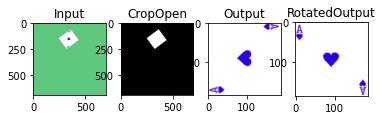

*****************

i=  7
corners= [[[266. 146.]]

 [[446. 182.]]

 [[332. 250.]]

 [[385.  76.]]]
corners tuple= 
 [(266, 146), (446, 182), (332, 250), (385, 76)]
sorted_corners = 
 [(385, 76), (266, 146), (446, 182), (332, 250)]
p1=  (266, 146)
p2=  (385, 76)
p3=  (332, 250)
p4=  (446, 182)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 181 175


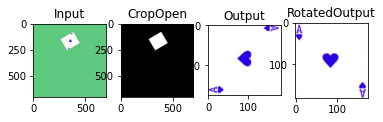

*****************

i=  8
corners= [[[465. 197.]]

 [[307. 130.]]

 [[344. 239.]]

 [[425.  87.]]]
corners tuple= 
 [(465, 197), (307, 130), (344, 239), (425, 87)]
sorted_corners = 
 [(425, 87), (307, 130), (465, 197), (344, 239)]
p1=  (307, 130)
p2=  (425, 87)
p3=  (344, 239)
p4=  (465, 197)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 160 153


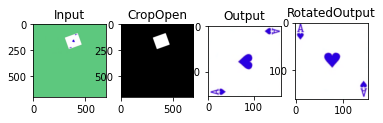

*****************

i=  9
corners= [[[367. 230.]]

 [[483. 207.]]

 [[347. 123.]]

 [[464. 101.]]]
corners tuple= 
 [(367, 230), (483, 207), (347, 123), (464, 101)]
sorted_corners = 
 [(464, 101), (347, 123), (483, 207), (367, 230)]
p1=  (347, 123)
p2=  (464, 101)
p3=  (367, 230)
p4=  (483, 207)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 139 130


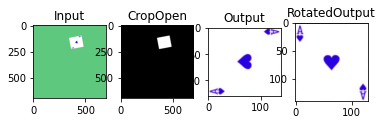

*****************

i=  10
corners= [[[377. 226.]]

 [[367. 122.]]

 [[482. 112.]]

 [[493. 213.]]]
corners tuple= 
 [(377, 226), (367, 122), (482, 112), (493, 213)]
sorted_corners = 
 [(482, 112), (367, 122), (493, 213), (377, 226)]
p1=  (367, 122)
p2=  (482, 112)
p3=  (377, 226)
p4=  (493, 213)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 129 118


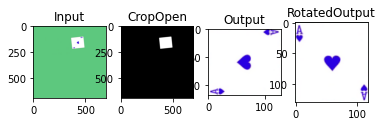

*****************

i=  11
corners= [[[483. 149.]]

 [[375. 143.]]

 [[477. 245.]]

 [[370. 240.]]]
corners tuple= 
 [(483, 149), (375, 143), (477, 245), (370, 240)]
sorted_corners = 
 [(375, 143), (483, 149), (370, 240), (477, 245)]
p1=  (375, 143)
p2=  (483, 149)
p3=  (370, 240)
p4=  (477, 245)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 115 104


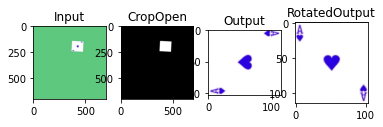

*****************

i=  12
corners= [[[477. 184.]]

 [[335. 246.]]

 [[444. 283.]]

 [[365. 151.]]]
corners tuple= 
 [(477, 184), (335, 246), (444, 283), (365, 151)]
sorted_corners = 
 [(365, 151), (477, 184), (335, 246), (444, 283)]
p1=  (365, 151)
p2=  (477, 184)
p3=  (335, 246)
p4=  (444, 283)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 143 135


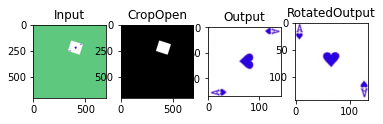

*****************

i=  13
corners= [[[320. 251.]]

 [[363. 152.]]

 [[473. 204.]]

 [[427. 300.]]]
corners tuple= 
 [(320, 251), (363, 152), (473, 204), (427, 300)]
sorted_corners = 
 [(363, 152), (473, 204), (320, 251), (427, 300)]
p1=  (363, 152)
p2=  (473, 204)
p3=  (320, 251)
p4=  (427, 300)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 156 149


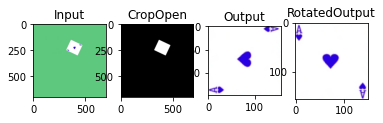

*****************

i=  14
corners= [[[287. 249.]]

 [[385. 330.]]

 [[361. 159.]]

 [[459. 242.]]]
corners tuple= 
 [(287, 249), (385, 330), (361, 159), (459, 242)]
sorted_corners = 
 [(361, 159), (459, 242), (287, 249), (385, 330)]
p1=  (361, 159)
p2=  (459, 242)
p3=  (287, 249)
p4=  (385, 330)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 173 172


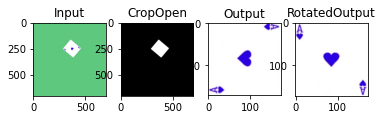

*****************

i=  15
corners= [[[439. 284.]]

 [[260. 241.]]

 [[336. 353.]]

 [[362. 171.]]]
corners tuple= 
 [(439, 284), (260, 241), (336, 353), (362, 171)]
sorted_corners = 
 [(362, 171), (260, 241), (439, 284), (336, 353)]
p1=  (260, 241)
p2=  (362, 171)
p3=  (336, 353)
p4=  (439, 284)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 180 183


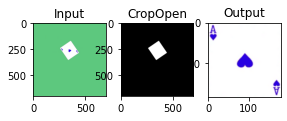

*****************

i=  16
corners= [[[311. 362.]]

 [[426. 305.]]

 [[249. 237.]]

 [[364. 180.]]]
corners tuple= 
 [(311, 362), (426, 305), (249, 237), (364, 180)]
sorted_corners = 
 [(364, 180), (249, 237), (426, 305), (311, 362)]
p1=  (249, 237)
p2=  (364, 180)
p3=  (311, 362)
p4=  (426, 305)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 178 183


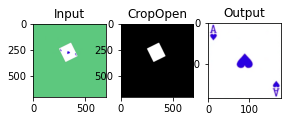

*****************

i=  17
corners= [[[393. 350.]]

 [[259. 372.]]

 [[234. 226.]]

 [[368. 204.]]]
corners tuple= 
 [(393, 350), (259, 372), (234, 226), (368, 204)]
sorted_corners = 
 [(368, 204), (234, 226), (393, 350), (259, 372)]
p1=  (234, 226)
p2=  (368, 204)
p3=  (259, 372)
p4=  (393, 350)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 160 173


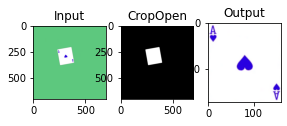

*****************

i=  18
corners= [[[209. 373.]]

 [[353. 389.]]

 [[369. 234.]]

 [[227. 219.]]]
corners tuple= 
 [(209, 373), (353, 389), (369, 234), (227, 219)]
sorted_corners = 
 [(227, 219), (369, 234), (209, 373), (353, 389)]
p1=  (227, 219)
p2=  (369, 234)
p3=  (209, 373)
p4=  (353, 389)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 161 176


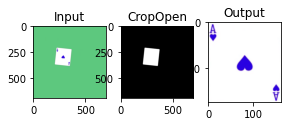

*****************

i=  19
corners= [[[332. 407.]]

 [[187. 374.]]

 [[367. 252.]]

 [[224. 217.]]]
corners tuple= 
 [(332, 407), (187, 374), (367, 252), (224, 217)]
sorted_corners = 
 [(224, 217), (367, 252), (187, 374), (332, 407)]
p1=  (224, 217)
p2=  (367, 252)
p3=  (187, 374)
p4=  (332, 407)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 181 193


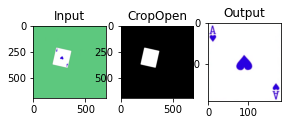

*****************

i=  20
corners= [[[218. 219.]]

 [[146. 372.]]

 [[359. 286.]]

 [[286. 439.]]]
corners tuple= 
 [(218, 219), (146, 372), (359, 286), (286, 439)]
sorted_corners = 
 [(218, 219), (359, 286), (146, 372), (286, 439)]
p1=  (218, 219)
p2=  (359, 286)
p3=  (146, 372)
p4=  (286, 439)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 214 222


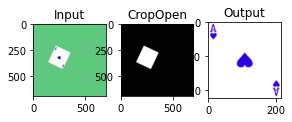

*****************

i=  21
corners= [[[347. 324.]]

 [[109. 363.]]

 [[224. 225.]]

 [[240. 464.]]]
corners tuple= 
 [(347, 324), (109, 363), (224, 225), (240, 464)]
sorted_corners = 
 [(224, 225), (347, 324), (109, 363), (240, 464)]
p1=  (224, 225)
p2=  (347, 324)
p3=  (109, 363)
p4=  (240, 464)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 239 242


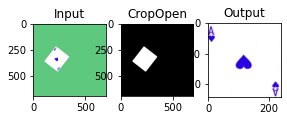

*****************

i=  22
corners= [[[339. 344.]]

 [[ 92. 363.]]

 [[212. 476.]]

 [[218. 229.]]]
corners tuple= 
 [(339, 344), (92, 363), (212, 476), (218, 229)]
sorted_corners = 
 [(218, 229), (339, 344), (92, 363), (212, 476)]
p1=  (218, 229)
p2=  (339, 344)
p3=  (92, 363)
p4=  (212, 476)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 248 248


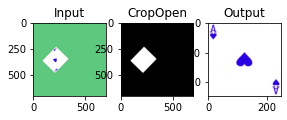

*****************

i=  23
corners= [[[ 79. 339.]]

 [[228. 259.]]

 [[301. 397.]]

 [[148. 475.]]]
corners tuple= 
 [(79, 339), (228, 259), (301, 397), (148, 475)]
sorted_corners = 
 [(228, 259), (79, 339), (301, 397), (148, 475)]
p1=  (79, 339)
p2=  (228, 259)
p3=  (148, 475)
p4=  (301, 397)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 225 218


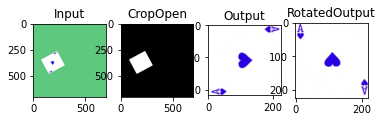

*****************

i=  24
corners= [[[125. 316.]]

 [[276. 288.]]

 [[148. 455.]]

 [[303. 428.]]]
corners tuple= 
 [(125, 316), (276, 288), (148, 455), (303, 428)]
sorted_corners = 
 [(276, 288), (125, 316), (303, 428), (148, 455)]
p1=  (125, 316)
p2=  (276, 288)
p3=  (148, 455)
p4=  (303, 428)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 182 169


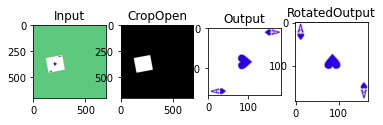

*****************

i=  25
corners= [[[306. 434.]]

 [[151. 310.]]

 [[302. 306.]]

 [[157. 443.]]]
corners tuple= 
 [(306, 434), (151, 310), (302, 306), (157, 443)]
sorted_corners = 
 [(302, 306), (151, 310), (306, 434), (157, 443)]
p1=  (151, 310)
p2=  (302, 306)
p3=  (157, 443)
p4=  (306, 434)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 156 140


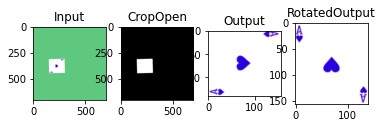

*****************

i=  26
corners= [[[206. 301.]]

 [[336. 331.]]

 [[178. 417.]]

 [[308. 449.]]]
corners tuple= 
 [(206, 301), (336, 331), (178, 417), (308, 449)]
sorted_corners = 
 [(206, 301), (336, 331), (178, 417), (308, 449)]
p1=  (206, 301)
p2=  (336, 331)
p3=  (178, 417)
p4=  (308, 449)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 160 149


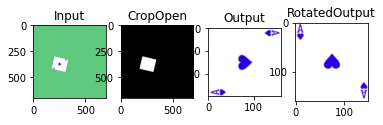

*****************

i=  27
corners= [[[211. 399.]]

 [[363. 352.]]

 [[320. 448.]]

 [[254. 303.]]]
corners tuple= 
 [(211, 399), (363, 352), (320, 448), (254, 303)]
sorted_corners = 
 [(254, 303), (363, 352), (211, 399), (320, 448)]
p1=  (254, 303)
p2=  (363, 352)
p3=  (211, 399)
p4=  (320, 448)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 153 146


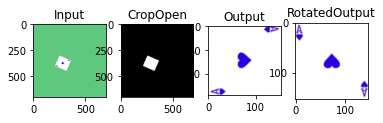

*****************

i=  28
corners= [[[229. 393.]]

 [[325. 446.]]

 [[278. 305.]]

 [[374. 358.]]]
corners tuple= 
 [(229, 393), (325, 446), (278, 305), (374, 358)]
sorted_corners = 
 [(278, 305), (374, 358), (229, 393), (325, 446)]
p1=  (278, 305)
p2=  (374, 358)
p3=  (229, 393)
p4=  (325, 446)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 146 142


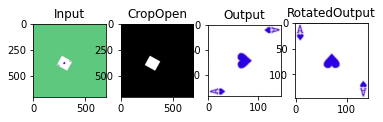

*****************

i=  29
corners= [[[267. 379.]]

 [[395. 370.]]

 [[341. 438.]]

 [[321. 311.]]]
corners tuple= 
 [(267, 379), (395, 370), (341, 438), (321, 311)]
sorted_corners = 
 [(321, 311), (395, 370), (267, 379), (341, 438)]
p1=  (321, 311)
p2=  (395, 370)
p3=  (267, 379)
p4=  (341, 438)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 129 128


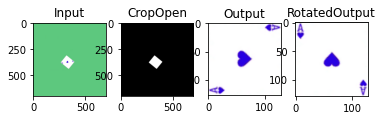

*****************

i=  30
corners= [[[353. 426.]]

 [[366. 318.]]

 [[413. 384.]]

 [[308. 362.]]]
corners tuple= 
 [(353, 426), (366, 318), (413, 384), (308, 362)]
sorted_corners = 
 [(366, 318), (308, 362), (413, 384), (353, 426)]
p1=  (308, 362)
p2=  (366, 318)
p3=  (353, 426)
p4=  (413, 384)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 106 109


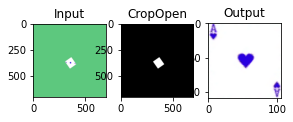

*****************

i=  31
corners= [[[329. 353.]]

 [[362. 418.]]

 [[421. 389.]]

 [[388. 323.]]]
corners tuple= 
 [(329, 353), (362, 418), (421, 389), (388, 323)]
sorted_corners = 
 [(388, 323), (329, 353), (421, 389), (362, 418)]
p1=  (329, 353)
p2=  (388, 323)
p3=  (362, 418)
p4=  (421, 389)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 93 96


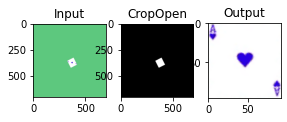

*****************

i=  32
corners= [[[425. 333.]]

 [[384. 399.]]

 [[373. 342.]]

 [[434. 390.]]]
corners tuple= 
 [(425, 333), (384, 399), (373, 342), (434, 390)]
sorted_corners = 
 [(425, 333), (373, 342), (434, 390), (384, 399)]
p1=  (373, 342)
p2=  (425, 333)
p3=  (384, 399)
p4=  (434, 390)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 63 68


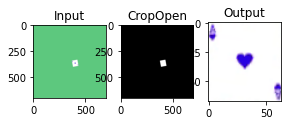

*****************

i=  33
corners= [[[455. 389.]]

 [[406. 385.]]

 [[410. 330.]]

 [[459. 335.]]]
corners tuple= 
 [(455, 389), (406, 385), (410, 330), (459, 335)]
sorted_corners = 
 [(410, 330), (459, 335), (406, 385), (455, 389)]
p1=  (410, 330)
p2=  (459, 335)
p3=  (406, 385)
p4=  (455, 389)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 55 60


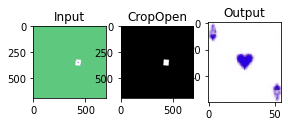

*****************

i=  34
corners= [[[413. 380.]]

 [[468. 391.]]

 [[425. 319.]]

 [[481. 330.]]]
corners tuple= 
 [(413, 380), (468, 391), (425, 319), (481, 330)]
sorted_corners = 
 [(425, 319), (481, 330), (413, 380), (468, 391)]
p1=  (425, 319)
p2=  (481, 330)
p3=  (413, 380)
p4=  (468, 391)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 70 75


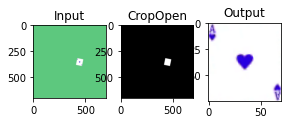

*****************

i=  35
corners= [[[491. 395.]]

 [[424. 366.]]

 [[523. 321.]]

 [[457. 293.]]]
corners tuple= 
 [(491, 395), (424, 366), (523, 321), (457, 293)]
sorted_corners = 
 [(457, 293), (523, 321), (424, 366), (491, 395)]
p1=  (457, 293)
p2=  (523, 321)
p3=  (424, 366)
p4=  (491, 395)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 100 104


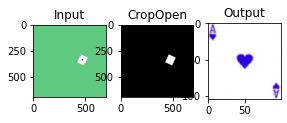

*****************

i=  36
corners= [[[505. 393.]]

 [[494. 262.]]

 [[434. 341.]]

 [[563. 318.]]]
corners tuple= 
 [(505, 393), (494, 262), (434, 341), (563, 318)]
sorted_corners = 
 [(494, 262), (563, 318), (434, 341), (505, 393)]
p1=  (494, 262)
p2=  (563, 318)
p3=  (434, 341)
p4=  (505, 393)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 130 132


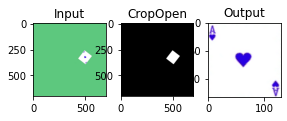

*****************

i=  37
corners= [[[581. 314.]]

 [[438. 323.]]

 [[508. 389.]]

 [[514. 247.]]]
corners tuple= 
 [(581, 314), (438, 323), (508, 389), (514, 247)]
sorted_corners = 
 [(514, 247), (581, 314), (438, 323), (508, 389)]
p1=  (514, 247)
p2=  (581, 314)
p3=  (438, 323)
p4=  (508, 389)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 144 143


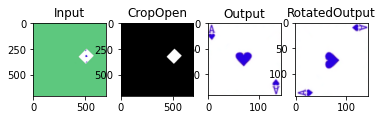

*****************

i=  38
corners= [[[608. 310.]]

 [[444. 285.]]

 [[503. 376.]]

 [[549. 216.]]]
corners tuple= 
 [(608, 310), (444, 285), (503, 376), (549, 216)]
sorted_corners = 
 [(549, 216), (444, 285), (608, 310), (503, 376)]
p1=  (444, 285)
p2=  (549, 216)
p3=  (503, 376)
p4=  (608, 310)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 165 161


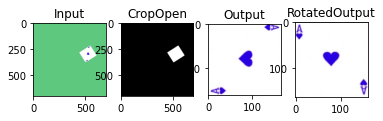

*****************

i=  39
corners= [[[481. 409.]]

 [[437. 288.]]

 [[612. 359.]]

 [[572. 245.]]]
corners tuple= 
 [(481, 409), (437, 288), (612, 359), (572, 245)]
sorted_corners = 
 [(572, 245), (437, 288), (612, 359), (481, 409)]
p1=  (437, 288)
p2=  (572, 245)
p3=  (481, 409)
p4=  (612, 359)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 177 168


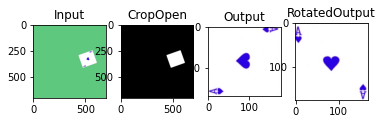

*****************

i=  40
corners= [[[609. 389.]]

 [[578. 257.]]

 [[466. 423.]]

 [[435. 290.]]]
corners tuple= 
 [(609, 389), (578, 257), (466, 423), (435, 290)]
sorted_corners = 
 [(578, 257), (435, 290), (609, 389), (466, 423)]
p1=  (435, 290)
p2=  (578, 257)
p3=  (466, 423)
p4=  (609, 389)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 177 167


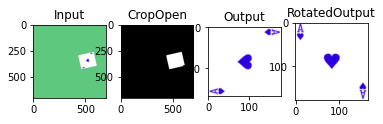

*****************

i=  41
corners= [[[435. 445.]]

 [[603. 441.]]

 [[435. 294.]]

 [[600. 294.]]]
corners tuple= 
 [(435, 445), (603, 441), (435, 294), (600, 294)]
sorted_corners = 
 [(435, 294), (600, 294), (603, 441), (435, 445)]
p1=  (435, 294)
p2=  (600, 294)
p3=  (435, 445)
p4=  (603, 441)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 172 155


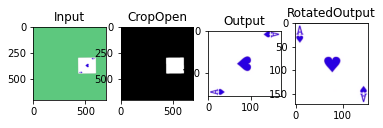

*****************

i=  42
corners= [[[404. 456.]]

 [[617. 334.]]

 [[439. 298.]]

 [[587. 497.]]]
corners tuple= 
 [(404, 456), (617, 334), (439, 298), (587, 497)]
sorted_corners = 
 [(439, 298), (617, 334), (404, 456), (587, 497)]
p1=  (439, 298)
p2=  (617, 334)
p3=  (404, 456)
p4=  (587, 497)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 217 201


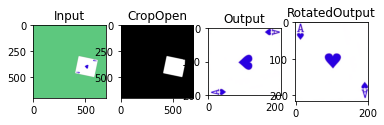

*****************

i=  43
corners= [[[390. 462.]]

 [[628. 363.]]

 [[574. 524.]]

 [[564. 523.]]]
corners tuple= 
 [(390, 462), (628, 363), (574, 524), (564, 523)]
sorted_corners = 
 [(628, 363), (390, 462), (564, 523), (574, 524)]
p1=  (390, 462)
p2=  (628, 363)
p3=  (564, 523)
p4=  (574, 524)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 239 225


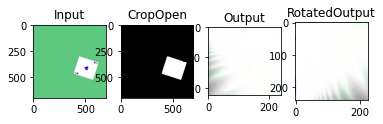

*****************

i=  44
corners= [[[542. 569.]]

 [[635. 424.]]

 [[469. 310.]]

 [[369. 466.]]]
corners tuple= 
 [(542, 569), (635, 424), (469, 310), (369, 466)]
sorted_corners = 
 [(469, 310), (635, 424), (369, 466), (542, 569)]
p1=  (469, 310)
p2=  (635, 424)
p3=  (369, 466)
p4=  (542, 569)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 268 262


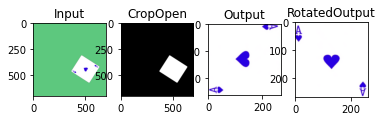

*****************

i=  45
corners= [[[621. 493.]]

 [[507. 340.]]

 [[486. 598.]]

 [[365. 446.]]]
corners tuple= 
 [(621, 493), (507, 340), (486, 598), (365, 446)]
sorted_corners = 
 [(507, 340), (365, 446), (621, 493), (486, 598)]
p1=  (365, 446)
p2=  (507, 340)
p3=  (486, 598)
p4=  (621, 493)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 257 260


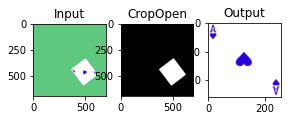

*****************

i=  46
corners= [[[607. 527.]]

 [[368. 438.]]

 [[461. 605.]]

 [[521. 359.]]]
corners tuple= 
 [(607, 527), (368, 438), (461, 605), (521, 359)]
sorted_corners = 
 [(521, 359), (368, 438), (607, 527), (461, 605)]
p1=  (368, 438)
p2=  (521, 359)
p3=  (461, 605)
p4=  (607, 527)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 240 248


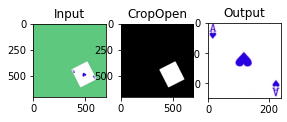

*****************

i=  47
corners= [[[408. 610.]]

 [[567. 586.]]

 [[381. 429.]]

 [[418. 609.]]]
corners tuple= 
 [(408, 610), (567, 586), (381, 429), (418, 609)]
sorted_corners = 
 [(381, 429), (567, 586), (418, 609), (408, 610)]
p1=  (381, 429)
p2=  (567, 586)
p3=  (408, 610)
p4=  (418, 609)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 187 204


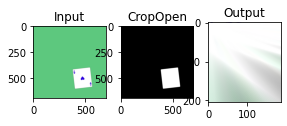

*****************

i=  48
corners= [[[362. 603.]]

 [[543. 453.]]

 [[388. 430.]]

 [[519. 624.]]]
corners tuple= 
 [(362, 603), (543, 453), (388, 430), (519, 624)]
sorted_corners = 
 [(388, 430), (543, 453), (362, 603), (519, 624)]
p1=  (388, 430)
p2=  (543, 453)
p3=  (362, 603)
p4=  (519, 624)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 184 199


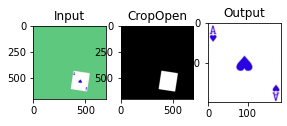

*****************

i=  49
corners= [[[342. 592.]]

 [[536. 470.]]

 [[491. 630.]]

 [[388. 426.]]]
corners tuple= 
 [(342, 592), (536, 470), (491, 630), (388, 426)]
sorted_corners = 
 [(388, 426), (536, 470), (342, 592), (491, 630)]
p1=  (388, 426)
p2=  (536, 470)
p3=  (342, 592)
p4=  (491, 630)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 196 208


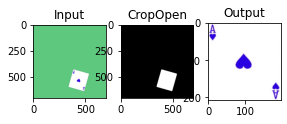

*****************

i=  50
corners= [[[519. 480.]]

 [[311. 548.]]

 [[438. 620.]]

 [[391. 406.]]]
corners tuple= 
 [(519, 480), (311, 548), (438, 620), (391, 406)]
sorted_corners = 
 [(391, 406), (519, 480), (311, 548), (438, 620)]
p1=  (391, 406)
p2=  (519, 480)
p3=  (311, 548)
p4=  (438, 620)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 209 215


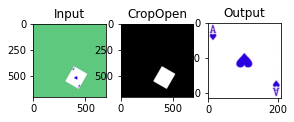

*****************

i=  51
corners= [[[294. 492.]]

 [[502. 490.]]

 [[389. 592.]]

 [[407. 385.]]]
corners tuple= 
 [(294, 492), (502, 490), (389, 592), (407, 385)]
sorted_corners = 
 [(407, 385), (502, 490), (294, 492), (389, 592)]
p1=  (407, 385)
p2=  (502, 490)
p3=  (294, 492)
p4=  (389, 592)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 209 208


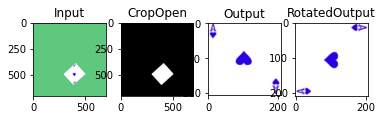

*****************

i=  52
corners= [[[424. 380.]]

 [[357. 572.]]

 [[490. 499.]]

 [[292. 451.]]]
corners tuple= 
 [(424, 380), (357, 572), (490, 499), (292, 451)]
sorted_corners = 
 [(424, 380), (292, 451), (490, 499), (357, 572)]
p1=  (292, 451)
p2=  (424, 380)
p3=  (357, 572)
p4=  (490, 499)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 199 193


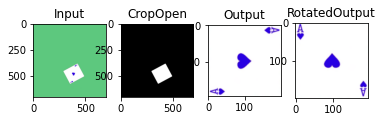

*****************

i=  53
corners= [[[450. 514.]]

 [[305. 386.]]

 [[306. 513.]]

 [[451. 386.]]]
corners tuple= 
 [(450, 514), (305, 386), (306, 513), (451, 386)]
sorted_corners = 
 [(305, 386), (451, 386), (306, 513), (450, 514)]
p1=  (305, 386)
p2=  (451, 386)
p3=  (306, 513)
p4=  (450, 514)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 148 133


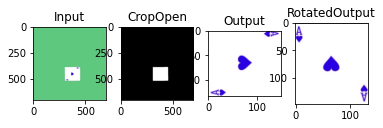

*****************

i=  54
corners= [[[279. 446.]]

 [[456. 401.]]

 [[336. 336.]]

 [[402. 506.]]]
corners tuple= 
 [(279, 446), (456, 401), (336, 336), (402, 506)]
sorted_corners = 
 [(336, 336), (456, 401), (279, 446), (402, 506)]
p1=  (336, 336)
p2=  (456, 401)
p3=  (279, 446)
p4=  (402, 506)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 178 172


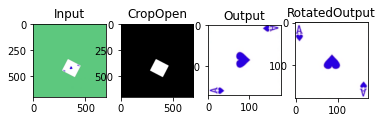

*****************

i=  55
corners= [[[372. 496.]]

 [[274. 408.]]

 [[450. 410.]]

 [[354. 321.]]]
corners tuple= 
 [(372, 496), (274, 408), (450, 410), (354, 321)]
sorted_corners = 
 [(354, 321), (274, 408), (450, 410), (372, 496)]
p1=  (274, 408)
p2=  (354, 321)
p3=  (372, 496)
p4=  (450, 410)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 177 176


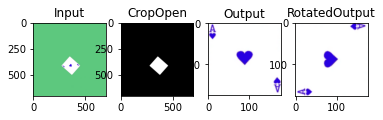

*****************

i=  56
corners= [[[384. 307.]]

 [[283. 340.]]

 [[423. 419.]]

 [[322. 455.]]]
corners tuple= 
 [(384, 307), (283, 340), (423, 419), (322, 455)]
sorted_corners = 
 [(384, 307), (283, 340), (423, 419), (322, 455)]
p1=  (283, 340)
p2=  (384, 307)
p3=  (322, 455)
p4=  (423, 419)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 142 150


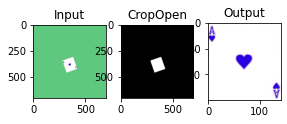

*****************

i=  57
corners= [[[383. 414.]]

 [[400. 307.]]

 [[286. 397.]]

 [[304. 292.]]]
corners tuple= 
 [(383, 414), (400, 307), (286, 397), (304, 292)]
sorted_corners = 
 [(304, 292), (400, 307), (286, 397), (383, 414)]
p1=  (304, 292)
p2=  (400, 307)
p3=  (286, 397)
p4=  (383, 414)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 116 126


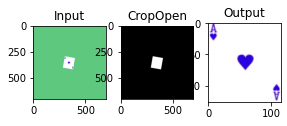

*****************

i=  58
corners= [[[319. 272.]]

 [[361. 403.]]

 [[403. 312.]]

 [[276. 365.]]]
corners tuple= 
 [(319, 272), (361, 403), (403, 312), (276, 365)]
sorted_corners = 
 [(319, 272), (403, 312), (276, 365), (361, 403)]
p1=  (319, 272)
p2=  (403, 312)
p3=  (276, 365)
p4=  (361, 403)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 128 133


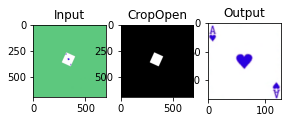

*****************

i=  59
corners= [[[322. 391.]]

 [[354. 272.]]

 [[398. 341.]]

 [[277. 322.]]]
corners tuple= 
 [(322, 391), (354, 272), (398, 341), (277, 322)]
sorted_corners = 
 [(354, 272), (277, 322), (398, 341), (322, 391)]
p1=  (277, 322)
p2=  (354, 272)
p3=  (322, 391)
p4=  (398, 341)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 122 120


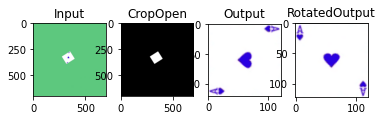

*****************

i=  60
corners= [[[296. 366.]]

 [[379. 297.]]

 [[376. 368.]]

 [[299. 295.]]]
corners tuple= 
 [(296, 366), (379, 297), (376, 368), (299, 295)]
sorted_corners = 
 [(299, 295), (379, 297), (296, 366), (376, 368)]
p1=  (299, 295)
p2=  (379, 297)
p3=  (296, 366)
p4=  (376, 368)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 86 76


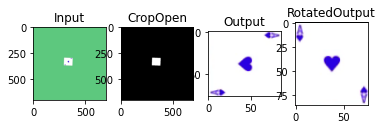

*****************

i=  61
corners= [[[361. 376.]]

 [[314. 287.]]

 [[291. 351.]]

 [[384. 312.]]]
corners tuple= 
 [(361, 376), (314, 287), (291, 351), (384, 312)]
sorted_corners = 
 [(314, 287), (384, 312), (291, 351), (361, 376)]
p1=  (314, 287)
p2=  (384, 312)
p3=  (291, 351)
p4=  (361, 376)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 94 90


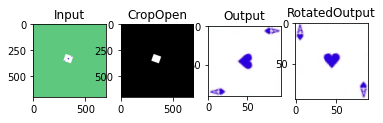

*****************

i=  62
corners= [[[383. 340.]]

 [[292. 324.]]

 [[333. 377.]]

 [[342. 286.]]]
corners tuple= 
 [(383, 340), (292, 324), (333, 377), (342, 286)]
sorted_corners = 
 [(342, 286), (292, 324), (383, 340), (333, 377)]
p1=  (292, 324)
p2=  (342, 286)
p3=  (333, 377)
p4=  (383, 340)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 92 92


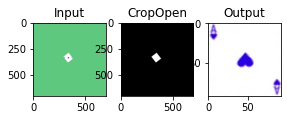

*****************

i=  63
corners= [[[379. 365.]]

 [[296. 298.]]

 [[366. 288.]]

 [[308. 375.]]]
corners tuple= 
 [(379, 365), (296, 298), (366, 288), (308, 375)]
sorted_corners = 
 [(366, 288), (296, 298), (379, 365), (308, 375)]
p1=  (296, 298)
p2=  (366, 288)
p3=  (308, 375)
p4=  (379, 365)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 84 91


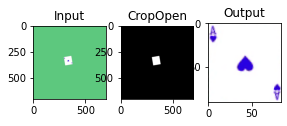

*****************

i=  64
corners= [[[371. 376.]]

 [[297. 370.]]

 [[378. 293.]]

 [[304. 287.]]]
corners tuple= 
 [(371, 376), (297, 370), (378, 293), (304, 287)]
sorted_corners = 
 [(304, 287), (378, 293), (297, 370), (371, 376)]
p1=  (304, 287)
p2=  (378, 293)
p3=  (297, 370)
p4=  (371, 376)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 84 92


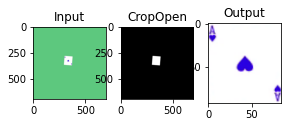

*****************

i=  65
corners= [[[277. 350.]]

 [[398. 313.]]

 [[347. 394.]]

 [[328. 269.]]]
corners tuple= 
 [(277, 350), (398, 313), (347, 394), (328, 269)]
sorted_corners = 
 [(328, 269), (398, 313), (277, 350), (347, 394)]
p1=  (328, 269)
p2=  (398, 313)
p3=  (277, 350)
p4=  (347, 394)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 122 126


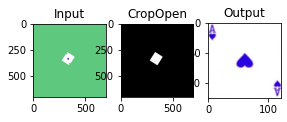

*****************

i=  66
corners= [[[319. 399.]]

 [[357. 264.]]

 [[407. 343.]]

 [[268. 320.]]]
corners tuple= 
 [(319, 399), (357, 264), (407, 343), (268, 320)]
sorted_corners = 
 [(357, 264), (268, 320), (407, 343), (319, 399)]
p1=  (268, 320)
p2=  (357, 264)
p3=  (319, 399)
p4=  (407, 343)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 140 136


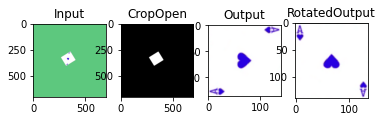

*****************

i=  67
corners= [[[405. 361.]]

 [[270. 302.]]

 [[300. 394.]]

 [[375. 269.]]]
corners tuple= 
 [(405, 361), (270, 302), (300, 394), (375, 269)]
sorted_corners = 
 [(375, 269), (270, 302), (405, 361), (300, 394)]
p1=  (270, 302)
p2=  (375, 269)
p3=  (300, 394)
p4=  (405, 361)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 138 130


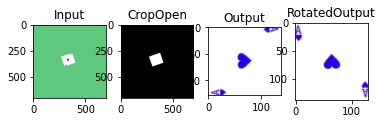

*****************

i=  68
corners= [[[262. 389.]]

 [[413. 274.]]

 [[401. 402.]]

 [[274. 261.]]]
corners tuple= 
 [(262, 389), (413, 274), (401, 402), (274, 261)]
sorted_corners = 
 [(274, 261), (413, 274), (262, 389), (401, 402)]
p1=  (274, 261)
p2=  (413, 274)
p3=  (262, 389)
p4=  (401, 402)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 156 142


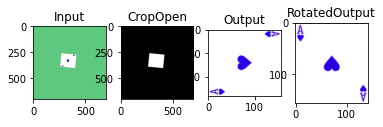

*****************

i=  69
corners= [[[370. 464.]]

 [[305. 199.]]

 [[203. 353.]]

 [[472. 310.]]]
corners tuple= 
 [(370, 464), (305, 199), (203, 353), (472, 310)]
sorted_corners = 
 [(305, 199), (472, 310), (203, 353), (370, 464)]
p1=  (305, 199)
p2=  (472, 310)
p3=  (203, 353)
p4=  (370, 464)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 270 266


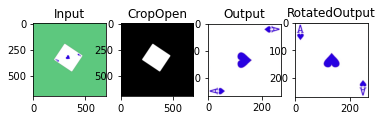

*****************

i=  70
corners= [[[322. 488.]]

 [[354. 175.]]

 [[489. 371.]]

 [[187. 293.]]]
corners tuple= 
 [(322, 488), (354, 175), (489, 371), (187, 293)]
sorted_corners = 
 [(354, 175), (187, 293), (489, 371), (322, 488)]
p1=  (187, 293)
p2=  (354, 175)
p3=  (322, 488)
p4=  (489, 371)
original image shape width={0) height={1} 700 700
rectangle width={1} height={1} 308 314


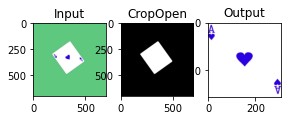

*****************



In [7]:
# cap =cv2.VideoCapture('small_Card_videoL.mp4')   # 0 for Primary Camera , 1 for Secondary Camera , 2 ... etc
# cap =cv2.VideoCapture('small_Card_short.mp4')   # 0 for Primary Camera , 1 for Secondary Camera , 2 ... etc
# cap =cv2.VideoCapture('small_Card_motionc.mp4')   # 0 for Primary Camera , 1 for Secondary Camera , 2 ... etc
# cap =cv2.VideoCapture('small_Card_motion_rescaled.mp4')   # 0 for Primary Camera , 1 for Secondary Camera , 2 ... etc
# cap =cv2.VideoCapture('small_Card_motion_rescaled_short.mp4')   # 0 for Primary Camera , 1 for Secondary Camera , 2 ... etc
cap =cv2.VideoCapture('small_Card_motion_rescaled_veryshort.mp4')   # 0 for Primary Camera , 1 for Secondary Camera , 2 ... etc


kernel = np.ones((51,51),np.uint8)
i=0  #cv2.VideoCapture() args :  int Or "Directory for Video"
while(1):
    p1,p2,p3,p4=0, 0, 0, 0
    ret,frame = cap.read()  # reading each frame : ret is a boolean if reading is done correctly or not , frame\
    if ret:
        print('i= ',i)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # ret,thresh1 = cv2.threshold(gray,40,255,cv2.THRESH_BINARY) # settings for video "small_Card_videoL.mp4"
        ret,thresh1 = cv2.threshold(gray,220,255,cv2.THRESH_BINARY) # settings for video "small_Card_motionc.mp4"
        opening = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

        if not os.path.exists('Frames_Folder'):
            os.makedirs('Frames_Folder')
        cv2.imshow('opening',opening) 
        cv2.imshow('frame',frame) 

        # Y,X= np.where(thresh1==255)
        Y,X= np.where(opening==255)

        max_y=max(Y)
        min_y=min(Y)
        max_x=max(X)
        min_x=min(X)
        width=max_x-min_x+1
        height=max_y-min_y+1
        
        #Only Two Errors
        corners = cv2.goodFeaturesToTrack(opening,4,0.00001,10)
        print('corners=',corners)
        corners = np.int0(corners)
        corners=corners.tolist()
        c=0
        corners_tuple=[]
        for item in corners:
            corners_tuple.append(tuple(corners[c][0]))
            c=c+1
        
        sorted_corners=sorted(corners_tuple, key=lambda c:c[1])
        print('corners tuple= \n',corners_tuple)
        print('sorted_corners = \n',sorted_corners)
        
        if sorted_corners[0][0]< sorted_corners[1][0]:
            p1=sorted_corners[0]
            p2=sorted_corners[1]
        else:
            p2=sorted_corners[0]
            p1=sorted_corners[1]
            
        if sorted_corners[2][0]< sorted_corners[3][0]:
            p3=sorted_corners[2]
            p4=sorted_corners[3]
        else:
            p4=sorted_corners[2]
            p3=sorted_corners[3]
            
        print('p1= ',p1)
        print('p2= ', p2)
        print('p3= ', p3)
        print('p4= ', p4)
        print('original image shape width={0) height={1}', opening.shape[1], opening.shape[0])
        print('rectangle width={1} height={1}',width, height)
        pts1 = np.float32([p1,p2,p3,p4])
        pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(frame,M,(width,height))
        plt.subplot(141),plt.imshow(frame),plt.title('Input')
        # plt.subplot(162),plt.imshow(gray,'gray'),plt.title('gray')
        # plt.subplot(163),plt.imshow(thresh1,'gray'),plt.title('thresh')
        plt.subplot(142),plt.imshow(opening,'gray'),plt.title('CropOpen')
        plt.subplot(143),plt.imshow(dst),plt.title('Output')

        if(width>height):
            filename_rotated='Frames_Folder/'+str(i)+'_Rotated_Frame.jpg'
            pts1 = np.float32([[0,0],[width,0],[0,height],[width,height]])
            pts2 = np.float32([[0,width],[0,0],[height,width],[height,0]])
            M2 = cv2.getPerspectiveTransform(pts1,pts2)
            dst2 = cv2.warpPerspective(dst,M2,(height,width))
            plt.subplot(144),plt.imshow(dst2),plt.title('RotatedOutput')
            save_check=cv2.imwrite( filename_rotated, dst2) 
        plt.show()
        
        filename='Frames_Folder/'+str(i)+'_Frame.jpg'
        filename_original='Frames_Folder/'+str(i)+'_original_Frame.jpg'
        save_check=cv2.imwrite( filename, dst)  
        save_check_original=cv2.imwrite( filename_original, frame)  
        if save_check== False:
            print('NOT successfully saved!**')
        print('*****************\n')    

    
        i=i+1
        if cv2.waitKey(1000) & 0xFF == ord('q'):# 0xFF is a hexadecimal constant which is 11111111 in binary.
            break                           # By using bitwise AND (&) with this constant,   
    else:
        break
cap.release()                             # it leaves only the last 8 bits of the original
cv2.destroyAllWindows() 